## Bank Marketing

CSE437 Data Science [Spring 2024]

Group 8

Section 01

Dataset source:  [Bank Marketing Dataset](https://archive.ics.uci.edu/dataset/222/bank+marketing)

References:

1.   List item
2.   List item



In [ ]:
# Basic libraries
import numpy as np
import pandas as pd

import math
import random
import datetime as dt
import seaborn as sns
import matplotlib.dates as mdates
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency

# For visualization
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
path = "/content/bank-full.csv"
df = pd.read_csv(path)
df.head()

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."


In [ ]:
df = pd.read_csv(path,delimiter = ';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## EDA and Data Cleaning


In [ ]:
#dataset shape
df.shape

(45211, 17)

In [ ]:
#dataset stats
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
#to find features with a single value:NONE FOUND
for column in df.columns:
    print(column,df[column].nunique())

age 77
job 12
marital 3
education 4
default 2
balance 7168
housing 2
loan 2
contact 3
day 31
month 12
duration 1573
campaign 48
pdays 559
previous 41
poutcome 4
y 2


In [ ]:
#finding duplicated values
duplicates = df.duplicated()
print(duplicates)

0        False
1        False
2        False
3        False
4        False
         ...  
45206    False
45207    False
45208    False
45209    False
45210    False
Length: 45211, dtype: bool


In [ ]:
#exploring categorical features
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['y']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [ ]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

#there are 9 categorical features, with "job" and "month" having the highest number of categories

The feature is job and number of categories are 12
The feature is marital and number of categories are 3
The feature is education and number of categories are 4
The feature is default and number of categories are 2
The feature is housing and number of categories are 2
The feature is loan and number of categories are 2
The feature is contact and number of categories are 3
The feature is month and number of categories are 12
The feature is poutcome and number of categories are 4


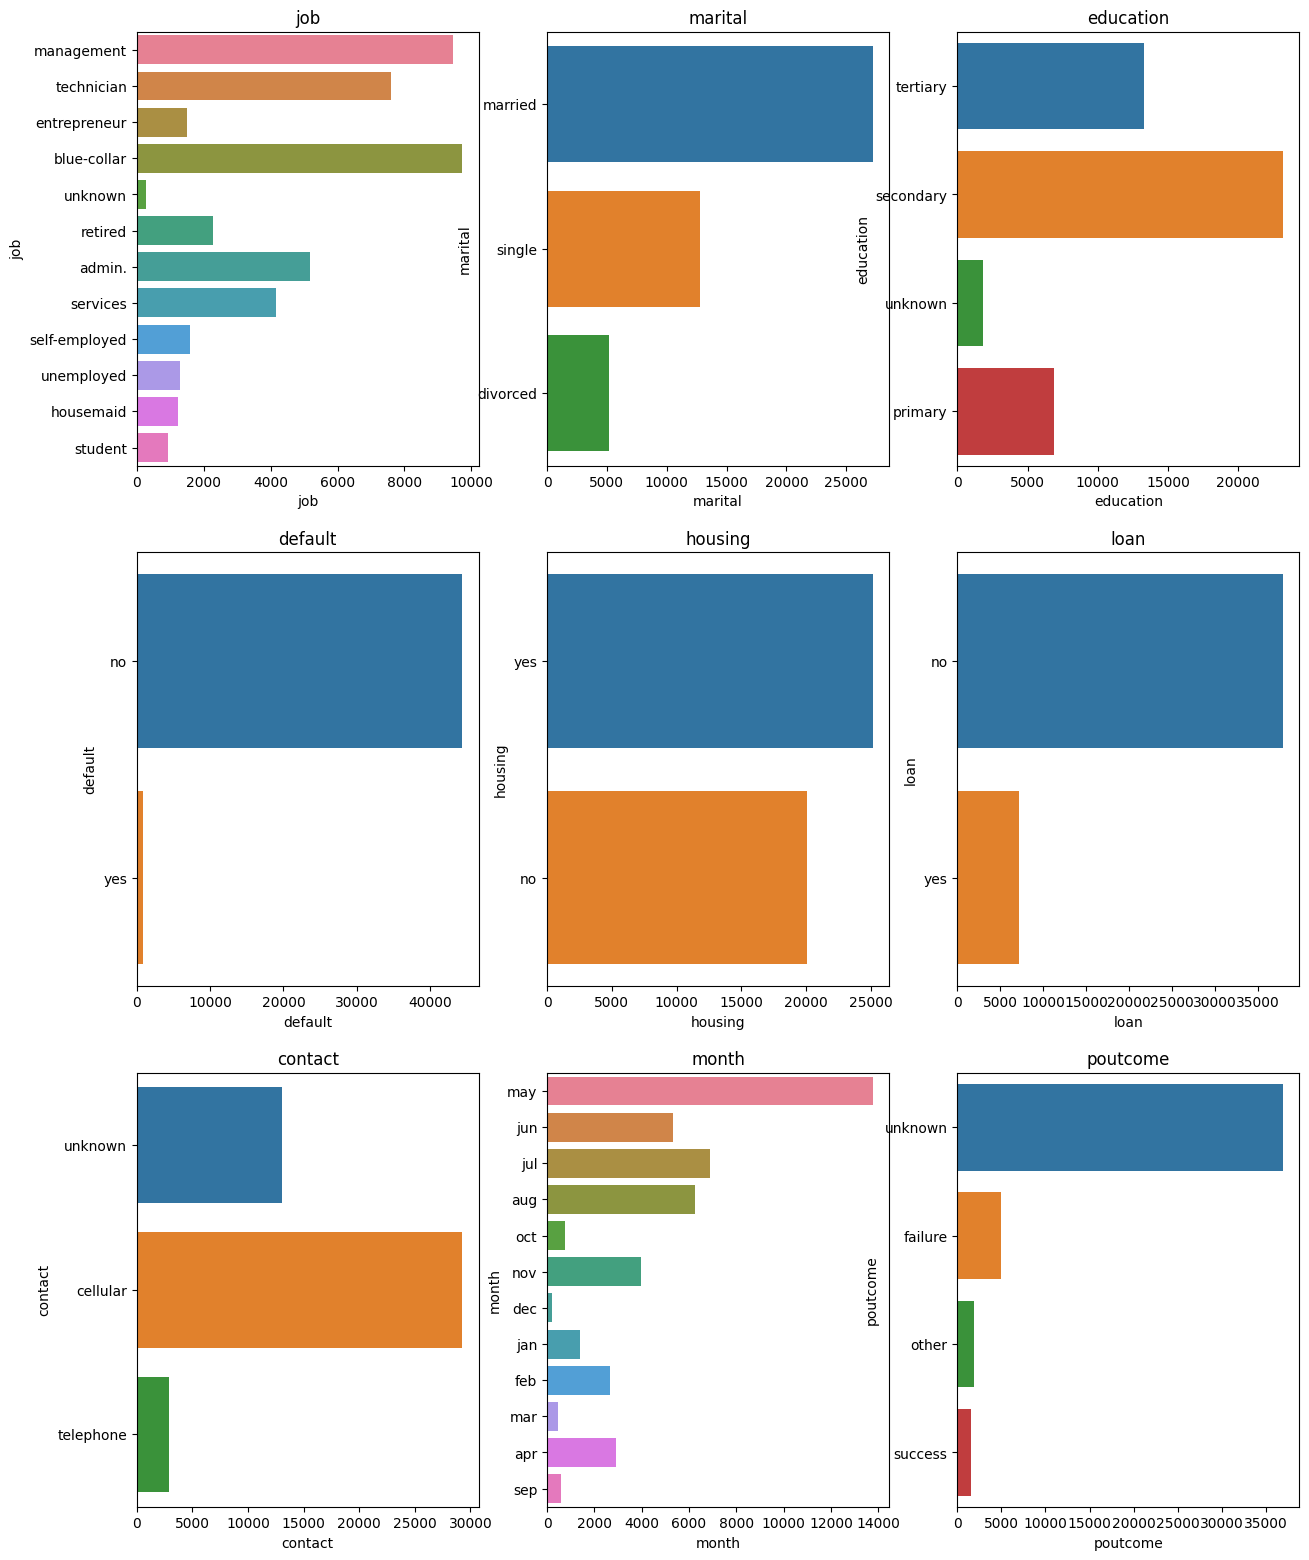

In [ ]:
#checking count based on categorical features
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df,hue=categorical_feature)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

In [ ]:
# clients with job type as management records are high in given dataset and student records are very less
# clients who married are high in records in given dataset and divorced are less
# clients with and without housing are more or less the same
# clients whose education background are secondary are in high numbers in given dataset
# default feature seems to not play an important role as it has value of no at high ratio to value of yes, meaning it can be dropped
# data in month of may is high and very less in dec

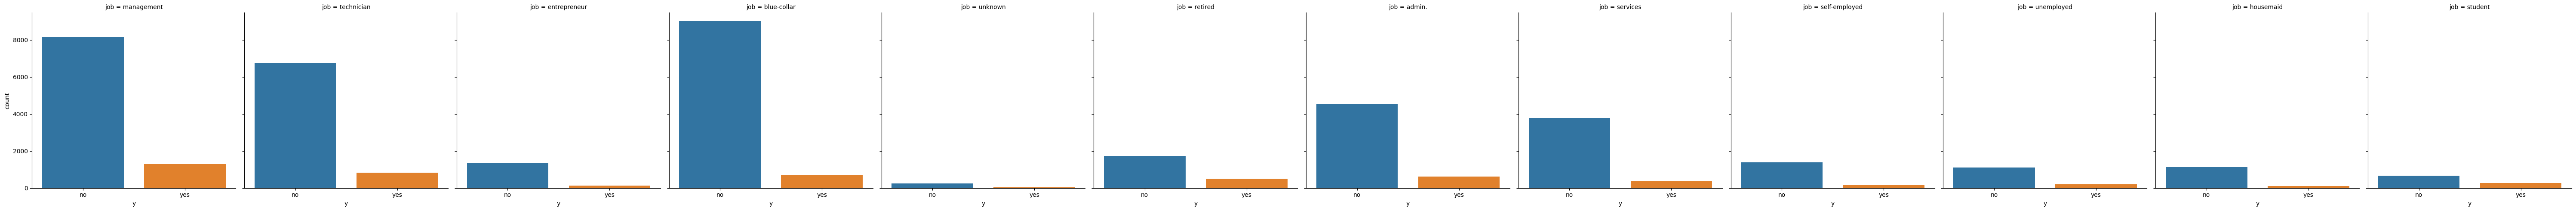

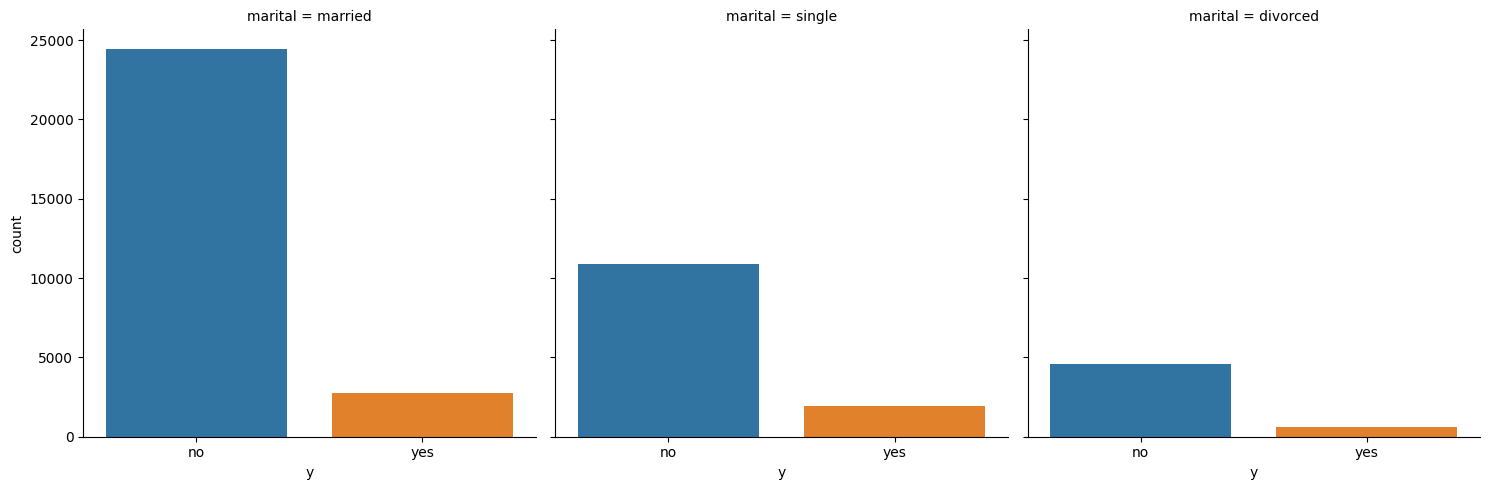

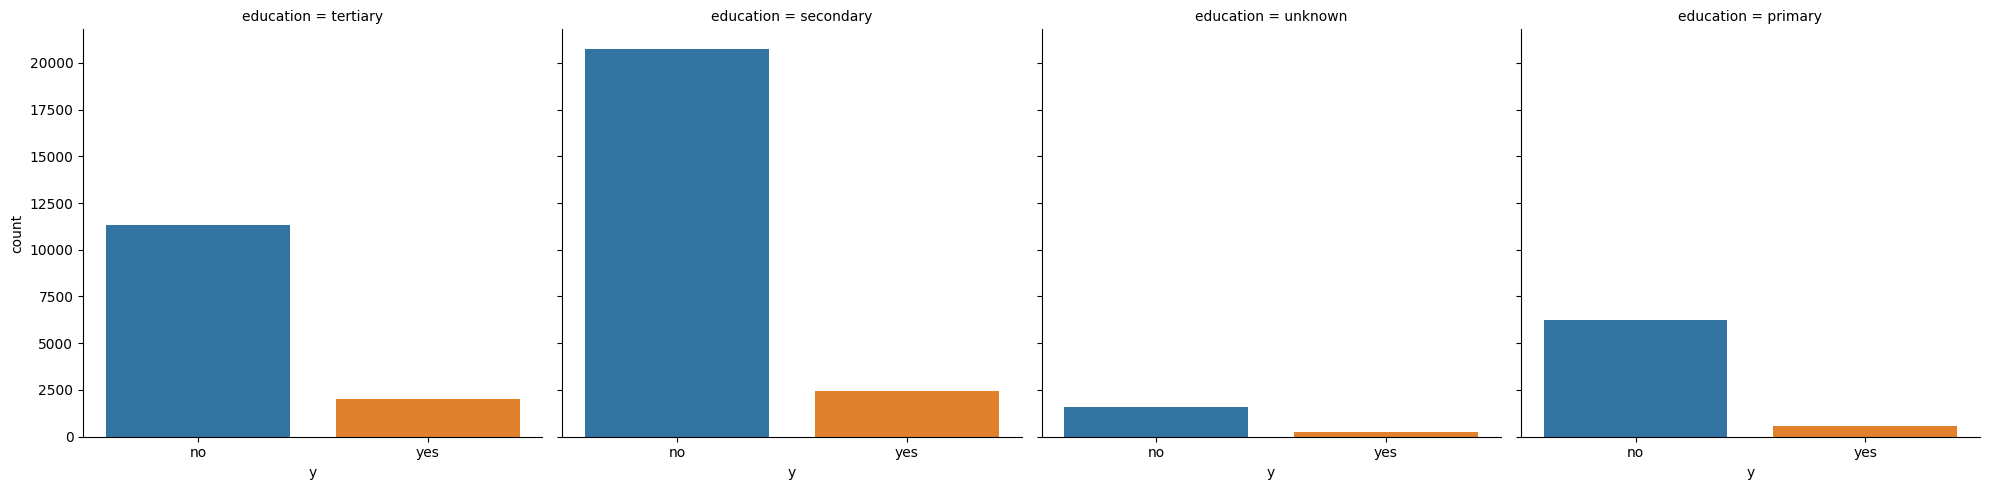

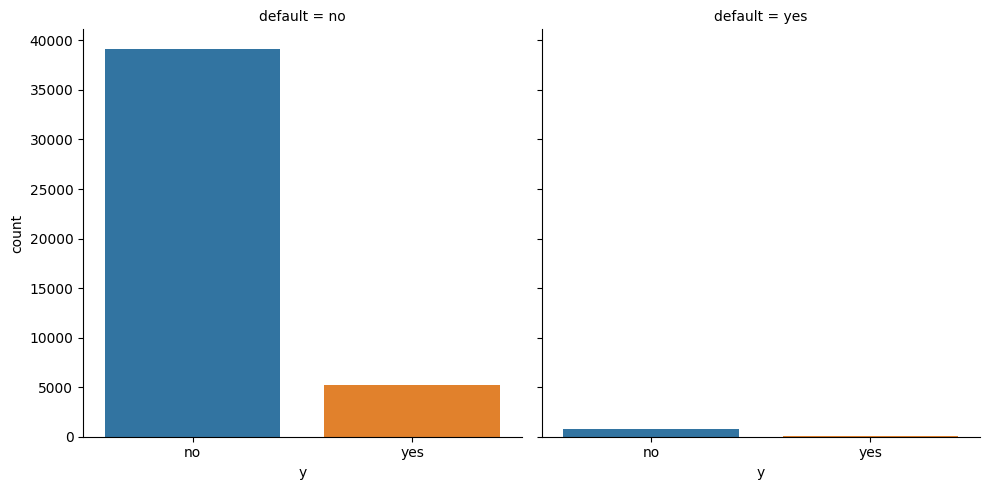

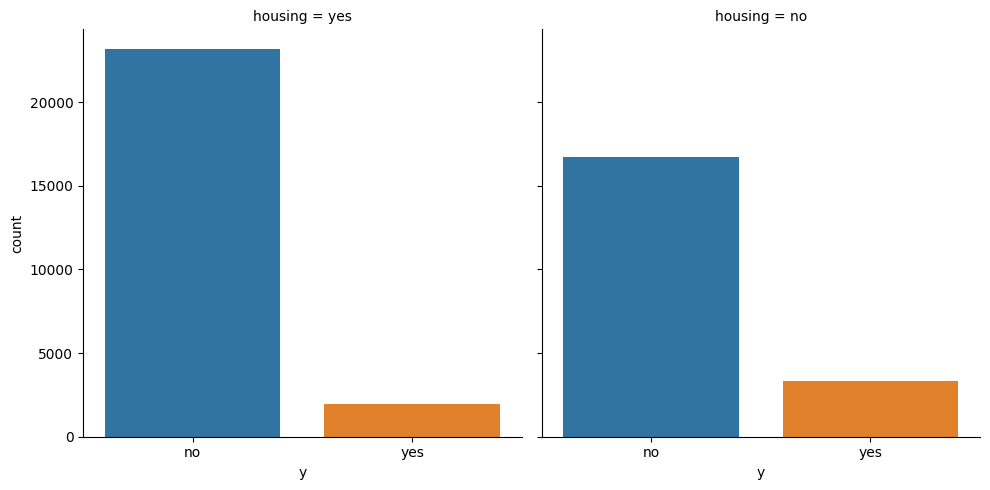

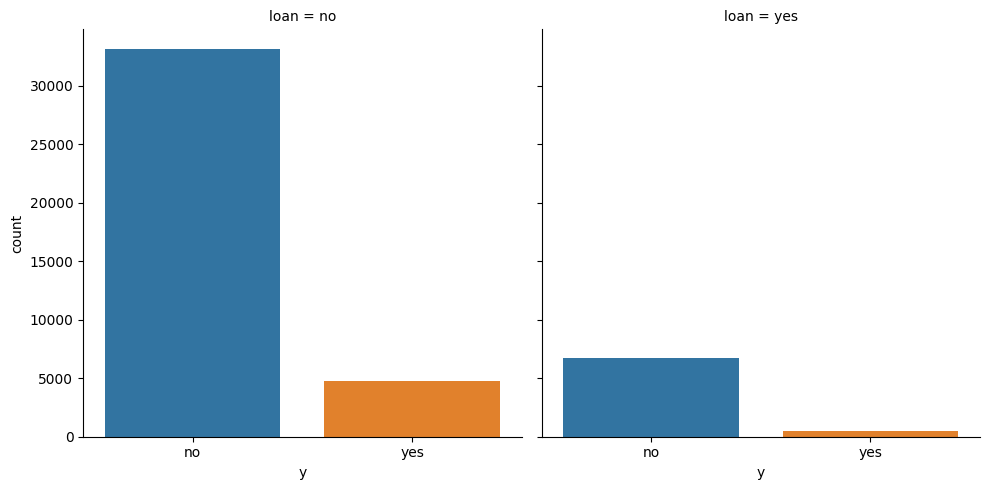

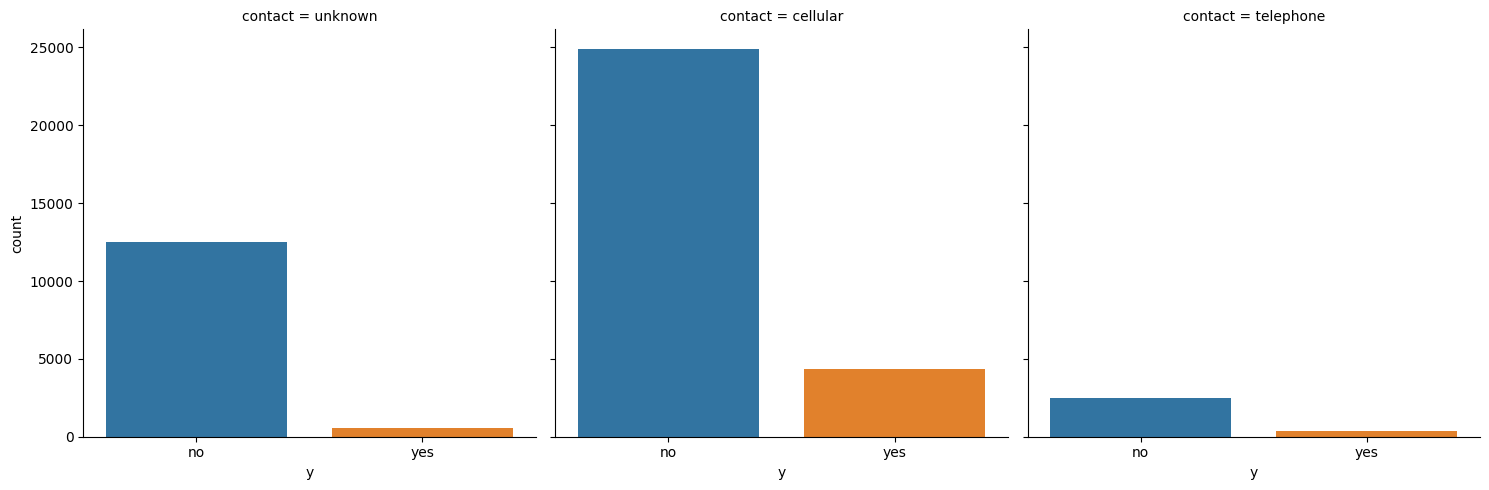

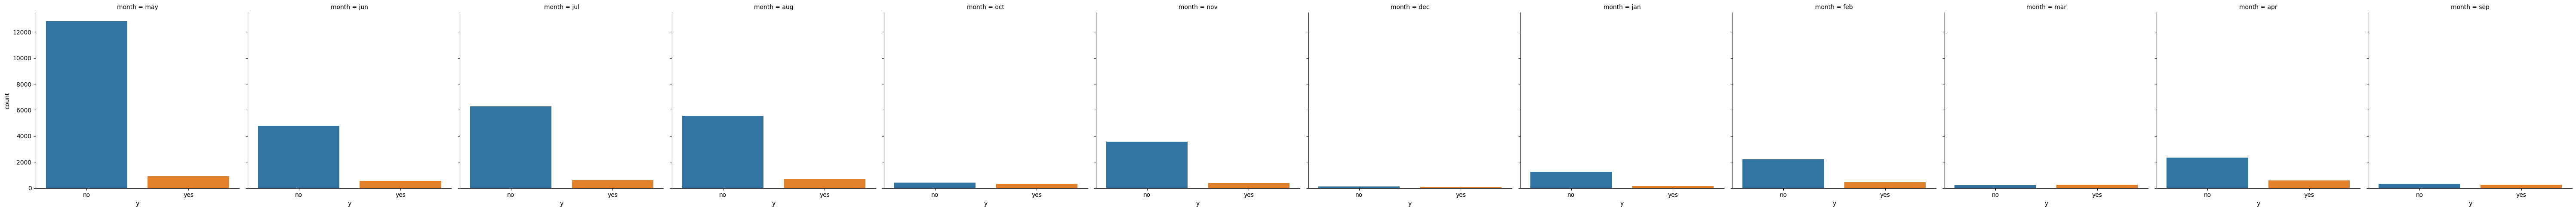

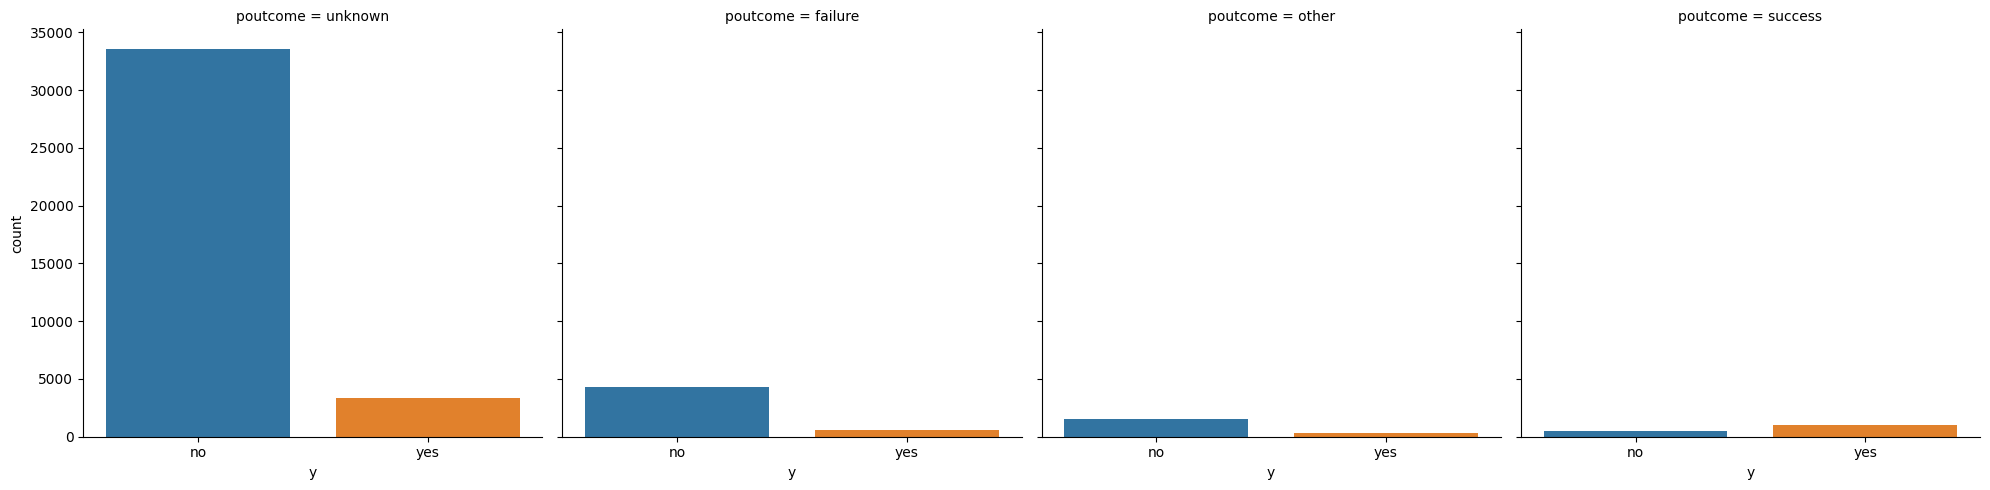

In [ ]:
#checking target label split over categorical features
#Finding out the relationship between categorical variable and dependent variable
for categorical_feature in categorical_features:
    sns.catplot(x='y', col=categorical_feature, kind='count', data= df, hue='y')
plt.show()

In [ ]:
#Checking target label split over categorical features and find the count
for categorical_feature in categorical_features:
    print(df.groupby(['y',categorical_feature]).size())
##y=deposit

y    job          
no   admin.           4540
     blue-collar      9024
     entrepreneur     1364
     housemaid        1131
     management       8157
     retired          1748
     self-employed    1392
     services         3785
     student           669
     technician       6757
     unemployed       1101
     unknown           254
yes  admin.            631
     blue-collar       708
     entrepreneur      123
     housemaid         109
     management       1301
     retired           516
     self-employed     187
     services          369
     student           269
     technician        840
     unemployed        202
     unknown            34
dtype: int64
y    marital 
no   divorced     4585
     married     24459
     single      10878
yes  divorced      622
     married      2755
     single       1912
dtype: int64
y    education
no   primary       6260
     secondary    20752
     tertiary     11305
     unknown       1605
yes  primary        591
     secondary     2

In [ ]:
# student and retired clients have higher yes/no ratio for deposit
# clients who have housing or loan don't seem to be much interested on deposit (i.e yes/no ratio is low)
# if pre campagin outcome(poutcome)=success then, there is higher chance of client showing interest (yes/no ratio) on deposit
# only in the month of March, clients show a higher interest to deposit
# in the month of May, deposit records are high but client interest ratio (yes/no) is very less

In [ ]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['y']))] #checking if dtype is an object or not
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  7


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [ ]:
#number of discrete features
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


In [ ]:
#continuous numerical features
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['y']]
print("Continuous feature Count: {}".format(len(continuous_features)))

Continuous feature Count: 7


<ipython-input-151-e8056d362a61>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[continuous_feature])
<ipython-input-151-e8056d362a61>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[continuous_feature])
<ipython-input-151-e8056d362a61>:7: UserWarning: 

`distplot` is a deprecated functi

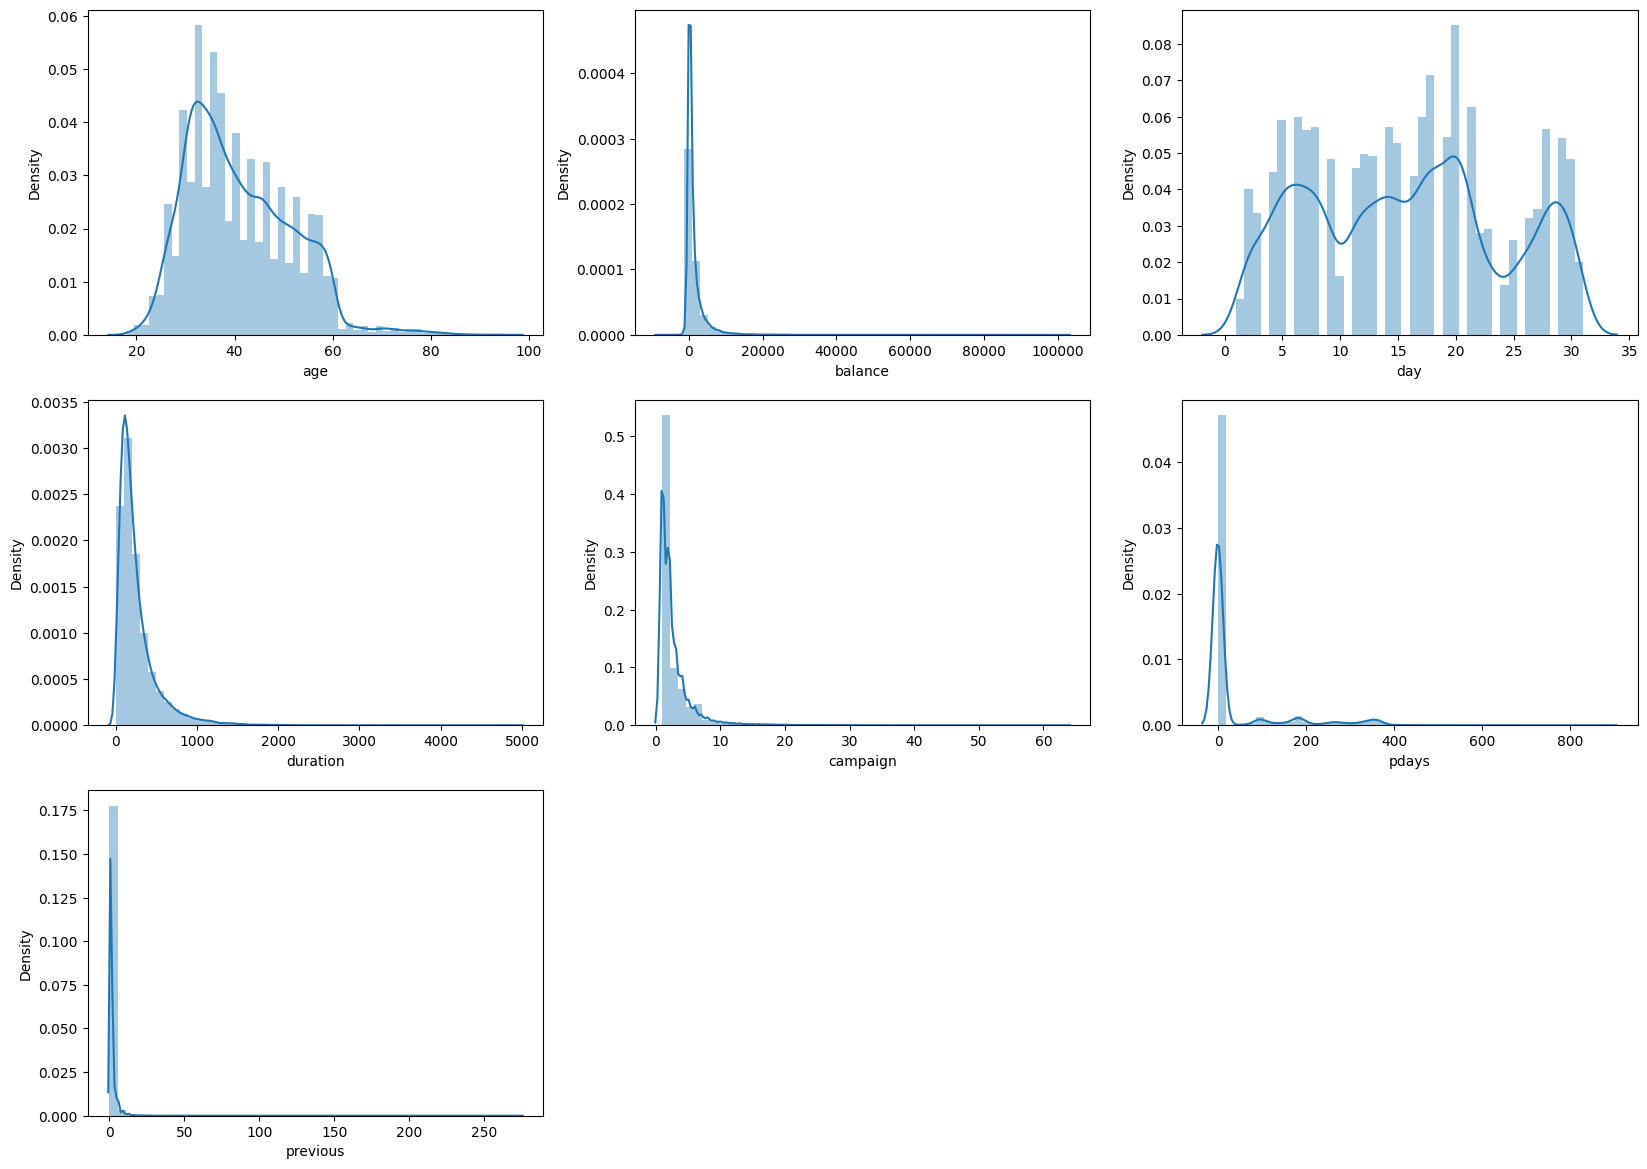

In [ ]:
#Distribution of continuous numerical features
#plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

In [ ]:
# age and day features seem to be closer to normal distribution
# balance, duration, compaign, pdays and previous features are heavily skewed towards the left and seem to have some outliers

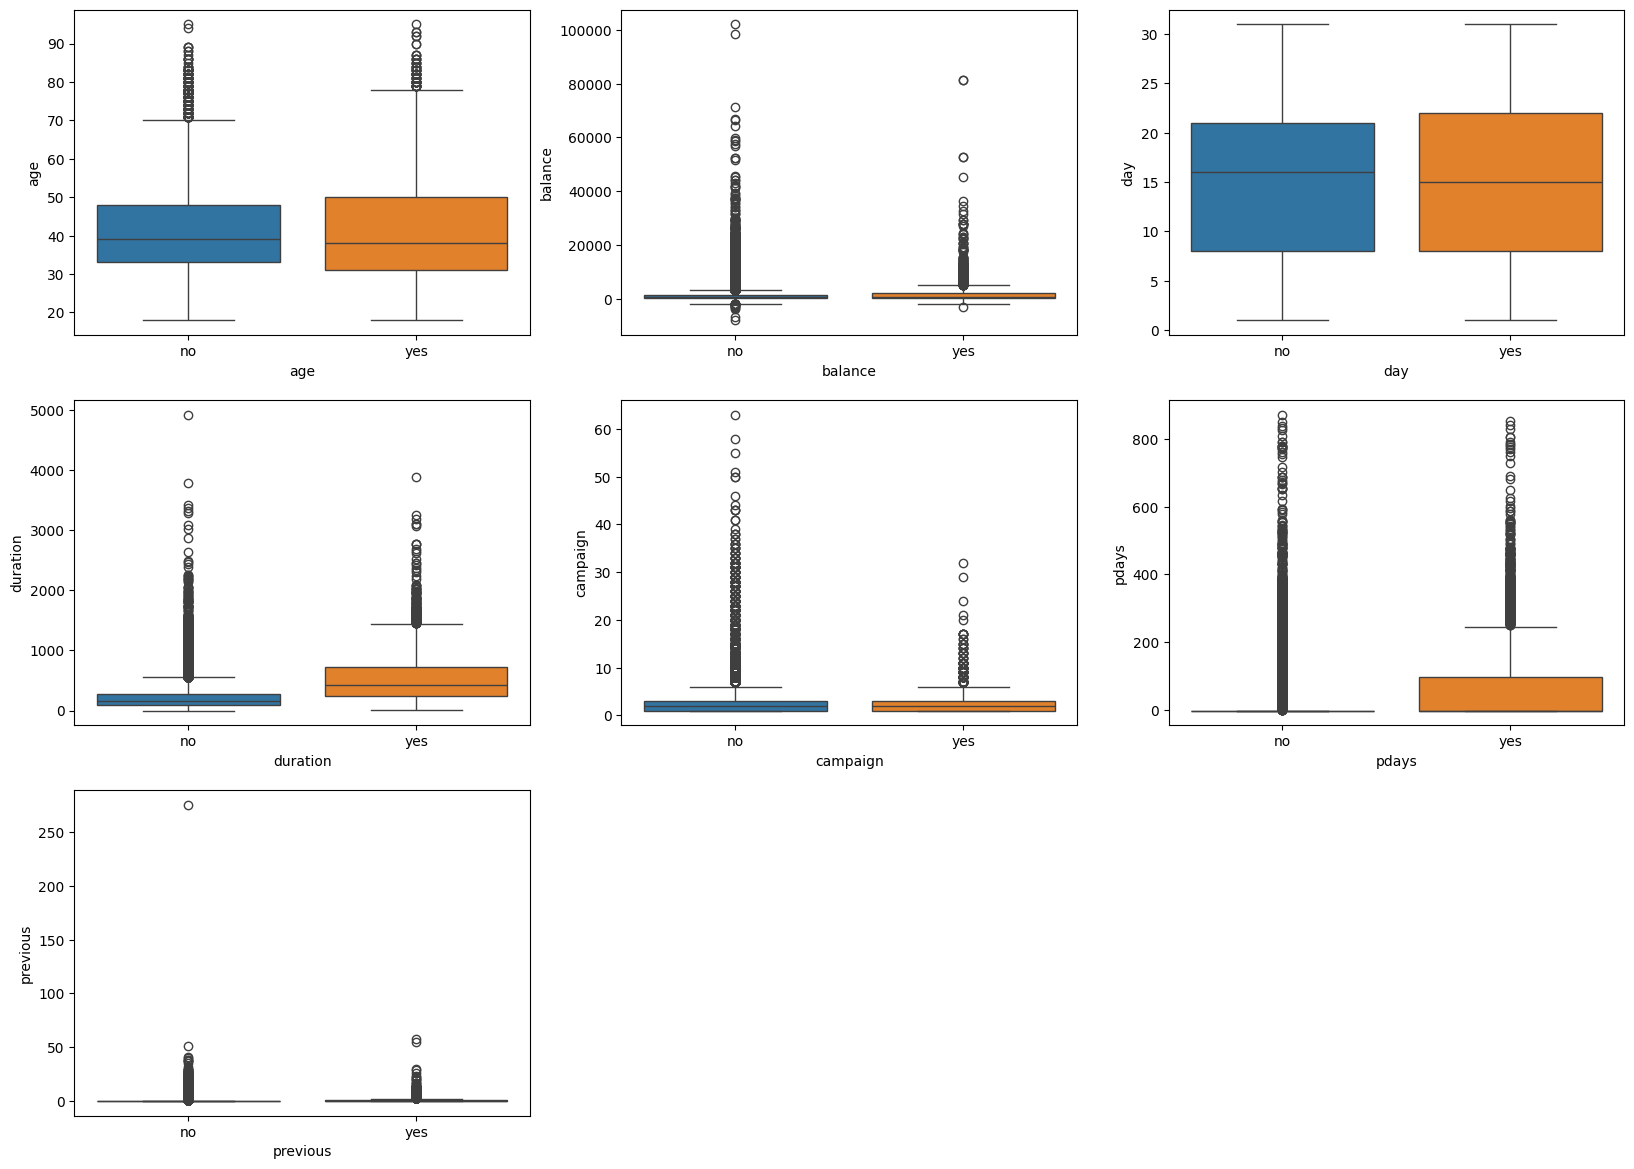

In [ ]:
# Relationship between continuous numerical features and target variable
#boxplot to show target distribution with respect numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="y", y= df[feature], data=df, hue = 'y')
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

In [ ]:
#clients with a longer discussion duration seem to be more interested in deposit (i.e have a high yes/no ratio)

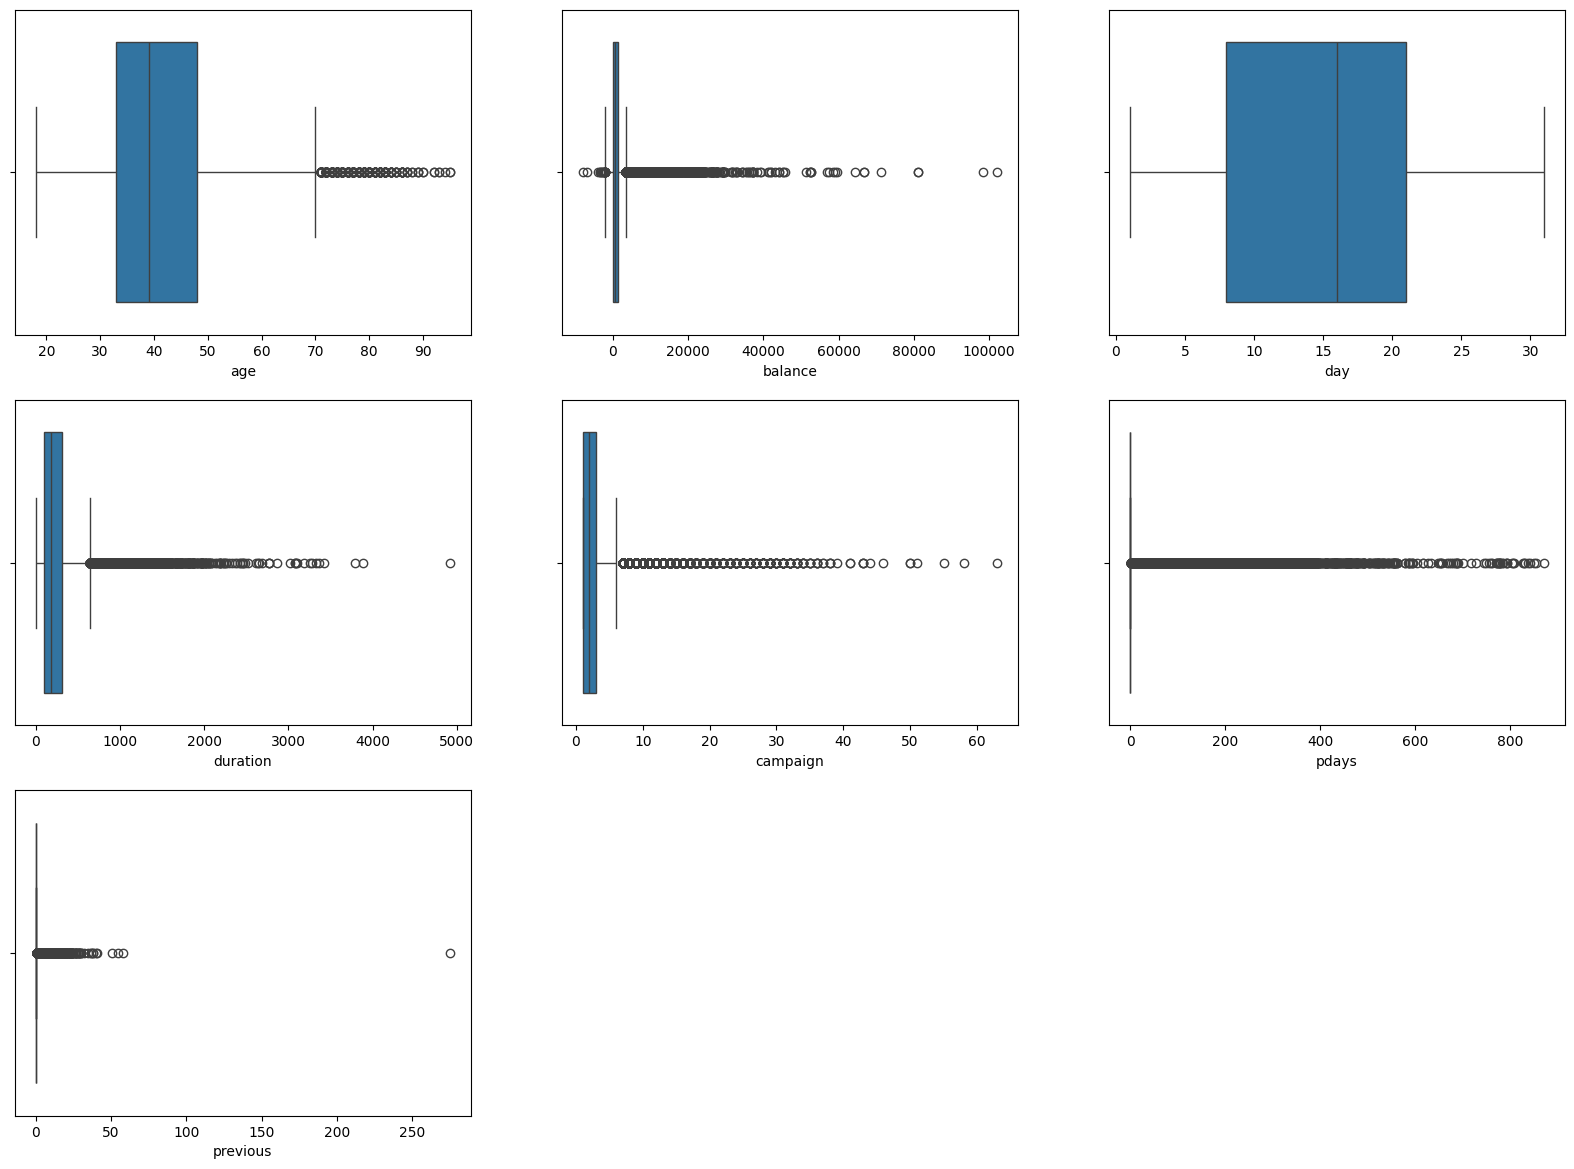

In [ ]:
#boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x=df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

In [ ]:
#balance, duration, compaign, pdays and previous have some outliers

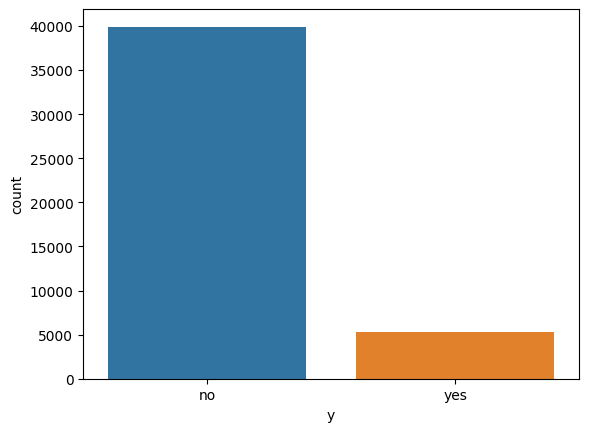

In [ ]:
#Checking if dataset is balanced based on label
sns.countplot(x='y',data=df, hue = 'y')
plt.show()

In [ ]:
df['y'].groupby(df['y']).count()

y
no     39922
yes     5289
Name: y, dtype: int64

In [ ]:
#dataset is kind of imbalanced (approx. 13%: yes, approx. 87%: no)

In [ ]:
#using one-hot encoding to label marital
temp_df = pd.get_dummies(df['marital'],dtype =int,prefix='marital')
df = pd.concat([temp_df,df],axis=1)
df.drop('marital',axis=1,inplace=True)

In [ ]:
#using label encoding to encode every category besides job and marital
education_map = {'unknown':0, 'primary':1, 'secondary':2, 'tertiary':3}
default_map = {'yes':1, 'no':0}
housing_map = {'yes':1, 'no':0}
loan_map = {'yes':1, 'no':0}
contact_map = {'unknown':0, 'telephone':1, 'cellular':2}
poutcome_map = {'success':1, 'failure':0, 'other':0, 'unknown':0}
month_map = {'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}
y_map = {'yes':1,'no':0}

df['education'] = df['education'].replace(education_map)
df['default'] = df['default'].replace(default_map)
df['housing'] = df['housing'].replace(housing_map)
df['loan'] = df['loan'].replace(loan_map)
df['contact'] = df['contact'].replace(contact_map)
df['poutcome'] = df['poutcome'].replace(poutcome_map)
df['month'] = df['month'].replace(month_map)
df['y'] = df['y'].replace(y_map)

In [ ]:
#Using count/frequency encoding to encode job
count = df['job'].value_counts()
df['job'] = df['job'].map(count)
df.head()

,marital_divorced,marital_married,marital_single,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,1,0,58,9458,3,0,2143,1,0,0,5,5,261,1,-1,0,0,0
1,0,0,1,44,7597,2,0,29,1,0,0,5,5,151,1,-1,0,0,0
2,0,1,0,33,1487,2,0,2,1,1,0,5,5,76,1,-1,0,0,0
3,0,1,0,47,9732,0,0,1506,1,0,0,5,5,92,1,-1,0,0,0
4,0,0,1,33,288,0,0,1,0,0,0,5,5,198,1,-1,0,0,0


In [ ]:
#using standardscaler to scale the numerical features (age,balance,contact,duration,campaign,pdays,previous)
numerical_features = ['age','balance','contact','duration','campaign','pdays','previous']
df[numerical_features] = StandardScaler().fit_transform(df[numerical_features])
df.head()

,marital_divorced,marital_married,marital_single,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,1,0,1.606965,9458,3,0,0.256419,1,0,-1.514306,5,5,0.011016,-0.569351,-0.411453,-0.25194,0,0
1,0,0,1,0.288529,7597,2,0,-0.437895,1,0,-1.514306,5,5,-0.416127,-0.569351,-0.411453,-0.25194,0,0
2,0,1,0,-0.747384,1487,2,0,-0.446762,1,1,-1.514306,5,5,-0.707361,-0.569351,-0.411453,-0.25194,0,0
3,0,1,0,0.571051,9732,0,0,0.047205,1,0,-1.514306,5,5,-0.645231,-0.569351,-0.411453,-0.25194,0,0
4,0,0,1,-0.747384,288,0,0,-0.447091,0,0,-1.514306,5,5,-0.233620,-0.569351,-0.411453,-0.25194,0,0


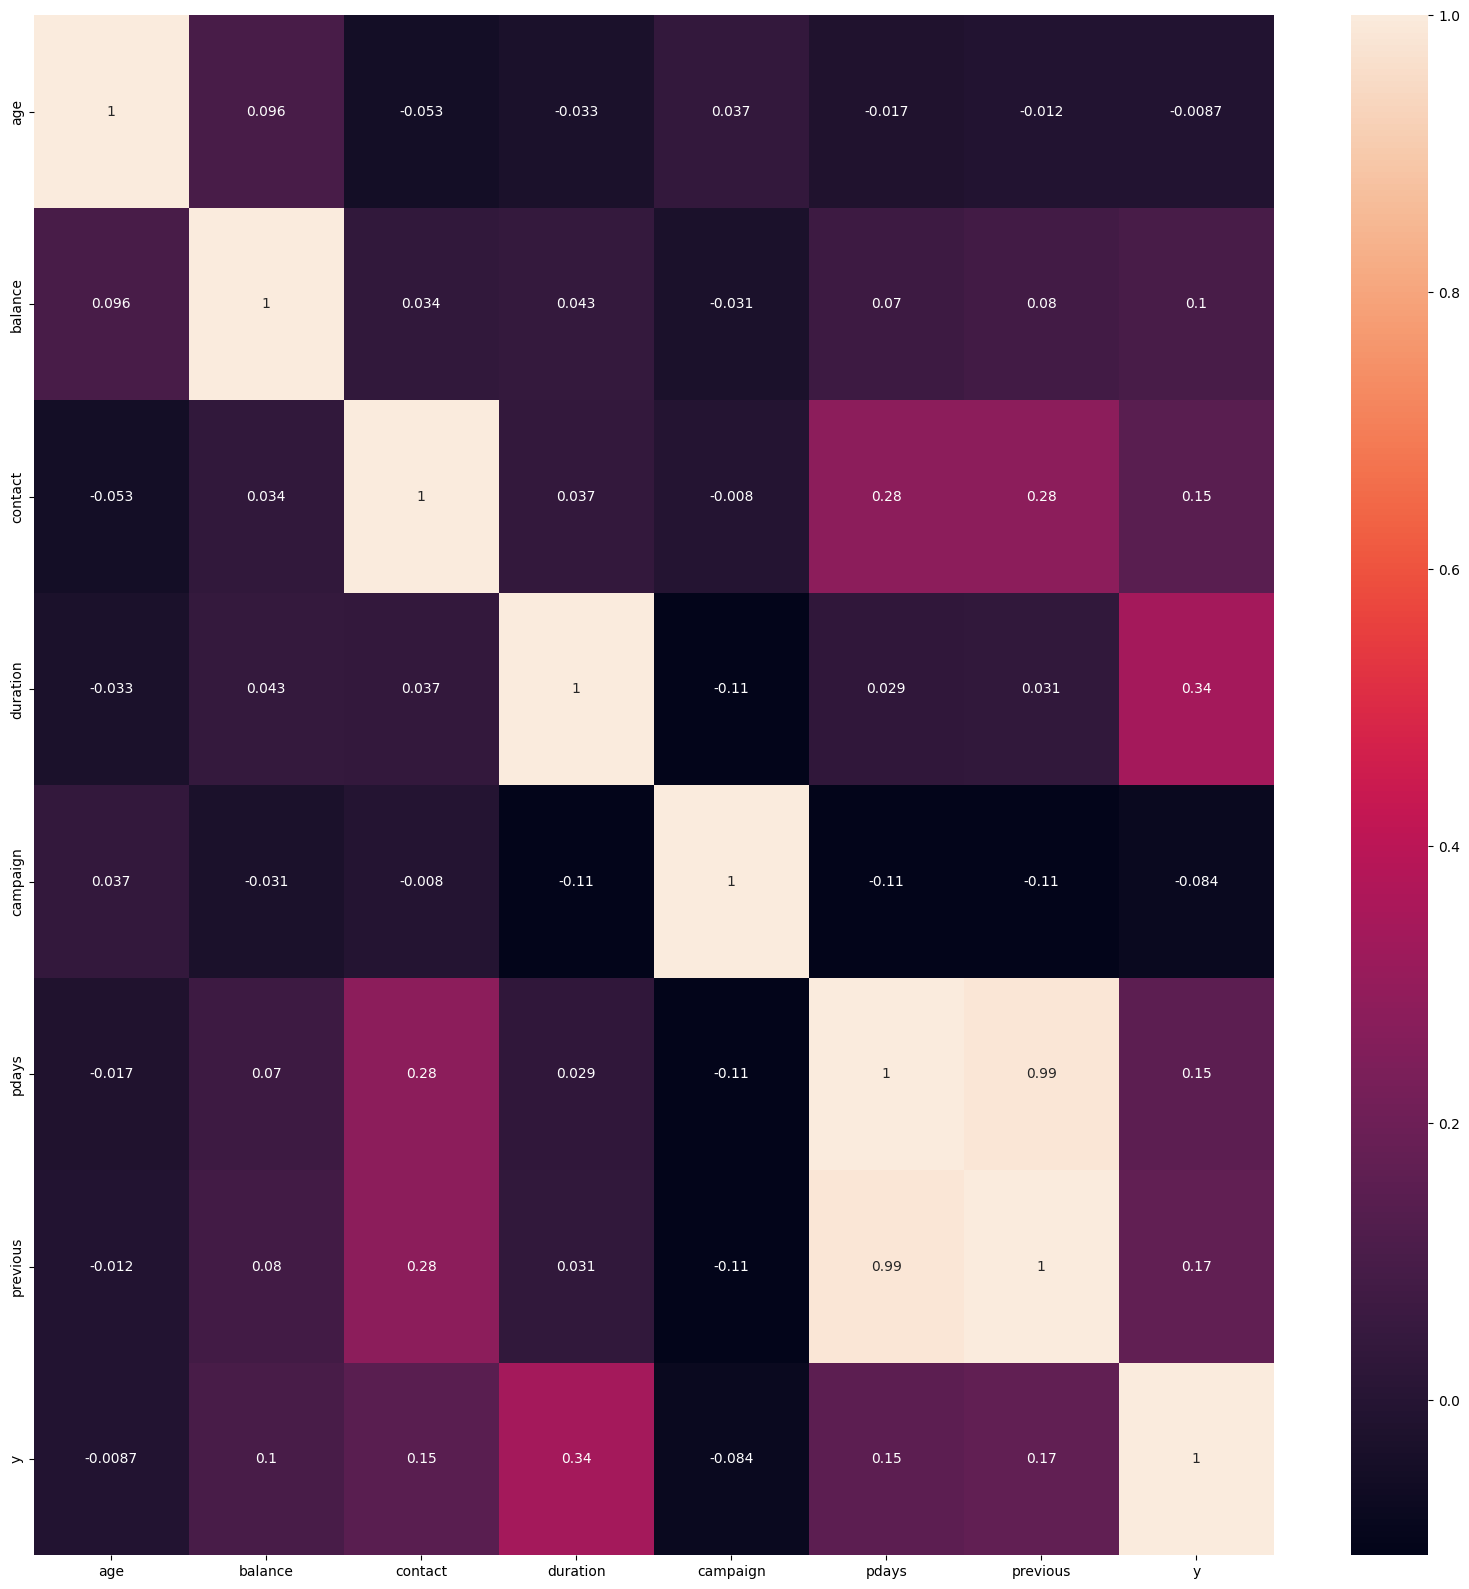

In [ ]:
#heatmap
target_numerical = pd.concat([df[numerical_features],df['y']], axis = 1)
corrmat = target_numerical.corr(method='spearman')
# corrmat = df.corr(method = 'spearman')
# top_features = corrmat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(corrmat,annot=True)
# h = sns.heatmap(df,annot=True)
# plt.show()

In [ ]:
# it seems no feature is heavily correlated with other features

In [ ]:
# Calculate Spearman's rank correlation coefficients
spearman_correlation = df.corr(method='spearman')['y'].drop('y')

print(spearman_correlation.sort_values())

housing            -0.139173
campaign           -0.084054
loan               -0.068185
job                -0.060759
marital_married    -0.060260
day                -0.029548
default            -0.022419
age                -0.008750
marital_divorced    0.002772
month               0.012410
education           0.060671
marital_single      0.063526
balance             0.100295
contact             0.145088
pdays               0.154055
previous            0.169124
poutcome            0.306788
duration            0.342469
Name: y, dtype: float64


In [ ]:
#chi-square for categorical(higher chi-square value->stronger association with target, i.e. y)

# Initialize an empty dictionary to store chi-square statistics
chi2_statistics = {}
target_categorical = ['job','education','default','housing','loan','contact', 'month','poutcome']
# Loop through each encoded categorical feature
for column in target_categorical:
    # Create a contingency table between the feature and the target variable
    contingency_table = pd.crosstab(df[column], df['y'])
    # Perform the chi-square test
    chi2, _, _, _ = chi2_contingency(contingency_table)
    # Store the chi-square statistic
    chi2_statistics[column] = chi2

# Convert the dictionary to a pandas Series for easier manipulation
chi2_series = pd.Series(chi2_statistics)

# Sort the features by their chi-square statistics in descending order
chi2_series = chi2_series.sort_values(ascending=False)

print(chi2_series)

poutcome     4249.905233
month        3061.838938
contact      1035.714225
housing       874.822449
job           836.105488
education     238.923506
loan          209.616980
default        22.202250
dtype: float64


In [ ]:
#based on both Spearman correlation and chi-square: "marital" category has the weakest correlation. Hence, this field will be dropped.

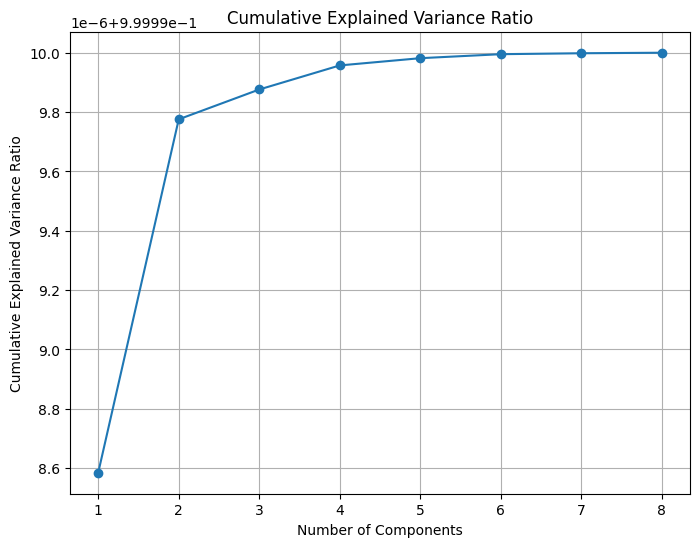

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

target_categorical = ['job','education','default','housing','loan','contact', 'month','poutcome']

# Fit TruncatedSVD
svd = TruncatedSVD(n_components=min(df[target_categorical].shape))
svd.fit(df[target_categorical])

# Obtain the explained variance ratio for each component
explained_variance_ratio = svd.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()


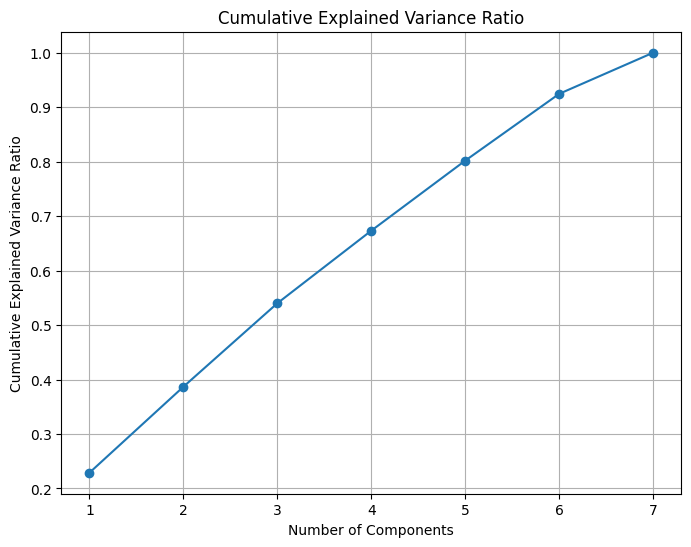

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

categorical_features = ['job', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Fit PCA
pca = PCA()
pca.fit(df[numerical_features])

# Obtain the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

In [ ]:
# Load dataframe
df = pd.read_csv(path, delimiter=';')

In [ ]:
# Dataset has no missing values, and no duplicates values. Therefore, no major cleaning required.

# Drop features with little to no correlation/reduandant features
df.drop(columns=["marital"])

,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
df.groupby(['y','pdays']).size()

y    pdays
no   -1       33570
      1           9
      2          35
      3           1
      4           1
              ...  
yes   804         1
      805         1
      828         1
      842         1
      854         1
Length: 914, dtype: int64

In [ ]:
# dropping pdays as it has a large chunk of values for -1+
df.drop(['pdays'],axis=1, inplace=True)

In [ ]:
# checking if outliers should be removed in the balance feature
df.groupby(['y','balance'],sort=True)['balance'].count()
# these outliers should not be remove as balance goes high, clients still show interest on deposit(y)

y    balance
no   -8019      1
     -6847      1
     -4057      1
     -3372      1
     -3313      1
               ..
yes   34646     1
      36252     1
      45248     1
      52587     2
      81204     2
Name: balance, Length: 9258, dtype: int64

In [ ]:
# checking if outliers should be removed in the duration feature
df.groupby(['y','duration'],sort=True)['duration'].count()
# these outlier should not be remove as duration goes high, clients still show interest on deposit(y)

y    duration
no   0            3
     1            2
     2            3
     3            4
     4           15
                 ..
yes  3094         1
     3102         1
     3183         1
     3253         1
     3881         1
Name: duration, Length: 2627, dtype: int64

In [ ]:
# checking if outliers should be removed in the campaign feature
df.groupby(['y','campaign'],sort=True)['campaign'].count()
#remove!

y    campaign
no   1           14983
     2           11104
     3            4903
     4            3205
     5            1625
                 ...  
yes  20              1
     21              1
     24              1
     29              1
     32              1
Name: campaign, Length: 70, dtype: int64

In [ ]:
df = df[df['campaign'] < 33]
#after removing outliers,
df.groupby(['y','campaign'],sort=True)['campaign'].count()

y    campaign
no   1           14983
     2           11104
     3            4903
     4            3205
     5            1625
     6            1199
     7             688
     8             508
     9             306
     10            252
     11            185
     12            151
     13            127
     14             89
     15             80
     16             77
     17             63
     18             51
     19             44
     20             42
     21             34
     22             23
     23             22
     24             19
     25             22
     26             13
     27             10
     28             16
     29             15
     30              8
     31             12
     32              8
yes  1            2561
     2            1401
     3             618
     4             317
     5             139
     6              92
     7              47
     8              32
     9              21
     10             14
     11             

In [ ]:
#checking if outliers should be removed in the previous feature
df.groupby(['y','previous'],sort=True)['previous'].count()
#remove!

y    previous
no   0           33532
     1            2189
     2            1650
     3             848
     4             543
                 ...  
yes  26              1
     29              1
     30              1
     55              1
     58              1
Name: previous, Length: 66, dtype: int64

In [ ]:
df = df[df['previous'] < 31]

## Feature Extraction

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
df = df.replace({'yes': 1, 'no': 0})

# Define X (features) and y (target variable)
X = df.drop(columns=['y'])  # Features
y = df['y']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define numerical and categorical features
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'previous']
categorical_features = ['job', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

In [ ]:
# Create preprocessing pipelines for numerical and categorical data
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('principalComponents',PCA(n_components=2))
])

categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder(drop='first')),
    ('sdv', TruncatedSVD(n_components=6))
])

# Combine preprocessing pipelines
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

# Preprocess the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Preprocess the testing data
X_test_preprocessed = preprocessor.transform(X_test)

In [ ]:
X_test_dense_df = pd.DataFrame(X_test_preprocessed)
X_test_dense_df.head()

,0,1,2,3,4,5,6,7
0,1.309713,1.711952,0.669888,0.262719,0.369229,0.212018,0.183269,-0.095770
1,0.915944,-0.706064,0.508036,-0.402525,0.653820,-0.400178,0.138550,0.350729
2,0.005886,0.990246,1.409023,-0.406777,0.436040,1.117968,-0.319941,0.645569
3,-2.146248,3.841948,0.206926,0.657337,-0.037901,-0.075908,-0.108695,0.016778
4,0.496504,1.611453,1.409786,-0.894628,-0.505028,-0.850572,0.390363,-0.124688


## Data Modeling

Models (Tentative)

*  Random Forest
*  Decision Trees
*  Logistic Regression
*  Gradient Boosting Machines (e.g., XGBoost, LightGBM)
*  Support Vector Machines (SVM)
*  Or others


Performance Measures
*   Accuracy
*   Precision
*   Recall
*   F1
*   ROC








In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import lightgbm as lgb
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

1. Random Forest classifier

In [ ]:
# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
rf.fit(X_train_preprocessed, y_train)

# Predict the target variable on the testing data
y_pred = rf.predict(X_test_preprocessed)

# Predict on the training data
y_train_pred = rf.predict(X_train_preprocessed)


In [ ]:
# Calculate train accuracy
rf_train_accuracy = accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", rf_train_accuracy)

# Calculate test accuracy
rf_test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", rf_test_accuracy)

Train Accuracy: 0.9998062444641276
Test Accuracy: 0.8820989704417137


In [ ]:
# Calculate precision
rf_precision = precision_score(y_test, y_pred)
print("Precision:", rf_precision)

# Calculate recall
rf_recall = recall_score(y_test, y_pred)
print("Recall:", rf_recall)

# Calculate F1-score
rf_f1 = f1_score(y_test, y_pred)
print("F1-score:", rf_f1)

# Calculate ROC-AUC score
rf_roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC Score:", rf_roc_auc)

# Calculate confusion matrix
rf_conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(rf_conf_matrix)

Precision: 0.5077220077220077
Recall: 0.2451071761416589
F1-score: 0.33060967944688874
ROC-AUC Score: 0.6065360001311311
Confusion Matrix:
[[7705  255]
 [ 810  263]]


2. Decision Tree Classifier

In [ ]:
# Initialize Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt.fit(X_train_preprocessed, y_train)

# Predict on the testing data
y_pred = dt.predict(X_test_preprocessed)

# Predict on the training data
y_train_pred = dt.predict(X_train_preprocessed)

In [ ]:
# Calculate train accuracy
dt_train_accuracy = accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", dt_train_accuracy)

# Calculate test accuracy
dt_test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", dt_test_accuracy)

Train Accuracy: 1.0
Test Accuracy: 0.8344957378501052


In [ ]:
# Calculate precision
dt_precision = precision_score(y_test, y_pred)
print("Precision:", dt_precision)

# Calculate recall
dt_recall = recall_score(y_test, y_pred)
print("Recall:", dt_recall)

# Calculate F1-score
dt_f1 = f1_score(y_test, y_pred)
print("F1-score:", dt_f1)

# Calculate ROC-AUC score
dt_roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC Score:", dt_roc_auc)

# Calculate confusion matrix
dt_conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(dt_conf_matrix)

Precision: 0.31327433628318585
Recall: 0.3299161230195713
F1-score: 0.3213799364502951
ROC-AUC Score: 0.6162143429168208
Confusion Matrix:
[[7184  776]
 [ 719  354]]


3. Logistic Regression Classifier

In [ ]:
# Initialize the Logistic Regression classifier
lr = LogisticRegression(random_state=42)

# Train the classifier on the training data
lr.fit(X_train_preprocessed, y_train)

# Predict the target variable on the testing data
y_pred_lr = lr.predict(X_test_preprocessed)

# Predict on the training data
y_train_pred_lr = lr.predict(X_train_preprocessed)

In [ ]:
# Calculate train accuracy
lr_train_accuracy = accuracy_score(y_train, y_train_pred_lr)
print("Train Accuracy:", lr_train_accuracy)

# Calculate test accuracy
lr_test_accuracy = accuracy_score(y_test, y_pred_lr)
print("Test Accuracy:", lr_test_accuracy)

Train Accuracy: 0.8824180690876883
Test Accuracy: 0.878667109487435


In [ ]:
#  precision
lr_precision = precision_score(y_test, y_pred_lr)
print("Precision:", lr_precision)

# recall
lr_recall = recall_score(y_test, y_pred_lr)
print("Recall:", lr_recall)

# F1-score
lr_f1 = f1_score(y_test, y_pred_lr)
print("F1-score:", lr_f1)

# ROC-AUC score
lr_roc_auc = roc_auc_score(y_test, y_pred_lr)
print("ROC-AUC Score:", lr_roc_auc)

# confusion matrix
lr_conf_matrix = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:")
print(lr_conf_matrix)

Precision: 0.4108527131782946
Recall: 0.049394221808014914
F1-score: 0.08818635607321132
ROC-AUC Score: 0.5199232415572738
Confusion Matrix:
[[7884   76]
 [1020   53]]


4. XGBClassifier

In [ ]:

xg_clf = xgb.XGBClassifier(random_state=42)
xg_clf.fit(X_train_preprocessed, y_train)

y_pred_xg = xg_clf.predict(X_test_preprocessed)
y_train_pred_xg = xg_clf.predict(X_train_preprocessed)

xg_train_accuracy = accuracy_score(y_train, y_train_pred_xg)
print("Train Accuracy:", xg_train_accuracy)

xg_test_accuracy = accuracy_score(y_test, y_pred_xg)
print("Test Accuracy:",xg_test_accuracy)

xg_precision = precision_score(y_test, y_pred_xg)
print("Precision:", xg_precision)

xg_recall = recall_score(y_test, y_pred_xg)
print("Recall:", xg_recall)

xg_f1 = f1_score(y_test, y_pred_xg)
print("F1:", xg_f1)

xg_roc_auc = roc_auc_score(y_test, y_pred_xg)
print("ROC auc", xg_roc_auc)

xg_conf_matrix = confusion_matrix(y_test, y_pred_xg)
print("Confusion Matrix:")
print(xg_conf_matrix)


Train Accuracy: 0.9237987156775908
Test Accuracy: 0.8850880106276985
Precision: 0.5425790754257908
Recall: 0.20782851817334577
F1: 0.3005390835579515
ROC auc 0.5921052138605423
Confusion Matrix:
[[7772  188]
 [ 850  223]]


In [ ]:
lgb_clf = lgb.LGBMClassifier(random_state=42)
lgb_clf.fit(X_train_preprocessed, y_train)

y_pred_lgb = lgb_clf.predict(X_test_preprocessed)
y_train_pred_lgb = lgb_clf.predict(X_train_preprocessed)

lgb_train_accuracy = accuracy_score(y_train, y_train_pred_lgb)
print("Train Accuracy:",lgb_train_accuracy)

lgb_test_accuracy = accuracy_score(y_test, y_pred_lgb)
print("Test Accuracy:" ,lgb_test_accuracy)

lgb_precision = precision_score(y_test, y_pred_lgb)
print("Precision:", lgb_precision)

lgb_recall = recall_score(y_test, y_pred_lgb)
print("Recall:", lgb_recall)

lgb_f1 = f1_score(y_test, y_pred_lgb)
print("F1:", lgb_f1)

lgb_roc_auc = roc_auc_score(y_test, y_pred_lgb)
print("ROC acc:", lgb_roc_auc)

lgb_conf_matrix = confusion_matrix(y_test, y_pred_lgb)
print("Confusion Matrix:")
print(lgb_conf_matrix)

[LightGBM] [Info] Number of positive: 4214, number of negative: 31914
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003156 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2037
[LightGBM] [Info] Number of data points in the train set: 36128, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116641 -> initscore=-2.024632
[LightGBM] [Info] Start training from score -2.024632
Train Accuracy: 0.9011846767050488
Test Accuracy: 0.88608435735636
Precision: 0.5718954248366013
Recall: 0.16309412861137
F1: 0.2538071065989848
ROC acc: 0.5733184210896046
Confusion Matrix:
[[7829  131]
 [ 898  175]]


**5**. __SVM__ Classifier

In [ ]:
# Initialize the SVM classifier
svm_clf = svm.SVC(random_state=42)

# Train the classifier on the training data
svm_clf.fit(X_train_preprocessed, y_train)

# Predict the target variable on the testing data
y_pred_svm = svm_clf.predict(X_test_preprocessed)

# Predict on the training data
y_train_pred_svm = svm_clf.predict(X_train_preprocessed)


In [ ]:
# Calculate train accuracy
svm_train_accuracy = accuracy_score(y_train, y_train_pred_svm)
print("Train Accuracy:", svm_train_accuracy)

# Calculate test accuracy
svm_test_accuracy = accuracy_score(y_test, y_pred_svm)
print("Train Accuracy:", svm_test_accuracy)


Train Accuracy: 0.8834422054915855
Train Accuracy: 0.8809919185209786


In [ ]:
# Calculate precision
svm_precision = precision_score(y_test, y_pred_svm)
print("Precision:", svm_precision)

# Calculate recall
svm_recall = recall_score(y_test, y_pred_svm)
print("Recall:" ,svm_recall)

# Calculate F1-score
svm_f1 = f1_score(y_test, y_pred_svm)
print("F1-Score:",svm_f1)

# Calculate ROC-AUC score
svm_roc_auc = roc_auc_score(y_test, y_pred_svm)
print("ROC-AUC:" ,svm_roc_auc)

# Calculate confusion matrix
print("Confusion Matrix:")
svm_conf_matrix = confusion_matrix(y_test, y_pred_svm)
print(svm_conf_matrix)

Precision: 0.0
Recall: 0.0
F1-Score: 0.0
ROC-AUC: 0.4998743718592965
Confusion Matrix:
[[7958    2]
 [1073    0]]


## Data Visualization

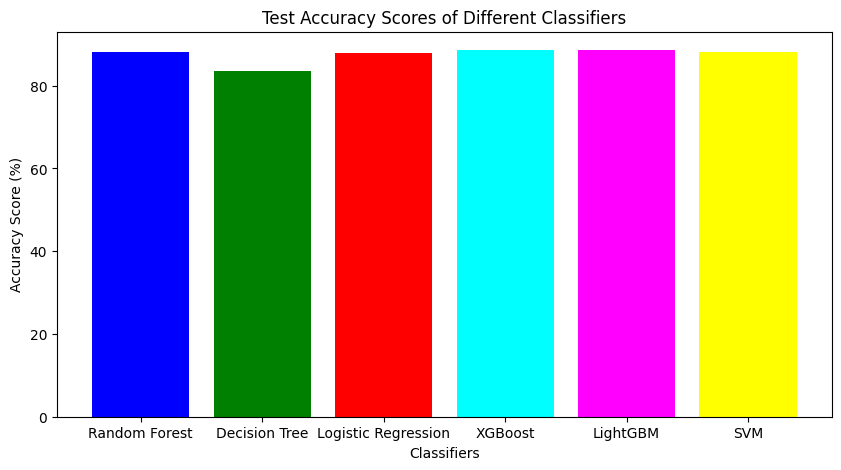

In [ ]:
#test accuracy
rf_test_accuracy_percent = rf_test_accuracy * 100
dt_test_accuracy_percent = dt_test_accuracy * 100
lr_test_accuracy_percent = lr_test_accuracy * 100
xg_test_accuracy_percent = xg_test_accuracy * 100
lgb_test_accuracy_percent = lgb_test_accuracy * 100
svm_test_accuracy_percent = svm_test_accuracy * 100
classifiers = ['Random Forest', 'Decision Tree', 'Logistic Regression', 'XGBoost', 'LightGBM', 'SVM']
accuracy_scores = [rf_test_accuracy_percent, dt_test_accuracy_percent, lr_test_accuracy_percent, xg_test_accuracy_percent, lgb_test_accuracy_percent, svm_test_accuracy_percent]
plt.figure(figsize=(10, 5))
plt.bar(classifiers, accuracy_scores, color=['blue', 'green', 'red', 'cyan', 'magenta', 'yellow'])
plt.xlabel('Classifiers')
plt.ylabel('Accuracy Score (%)')
plt.title('Test Accuracy Scores of Different Classifiers')
plt.show()

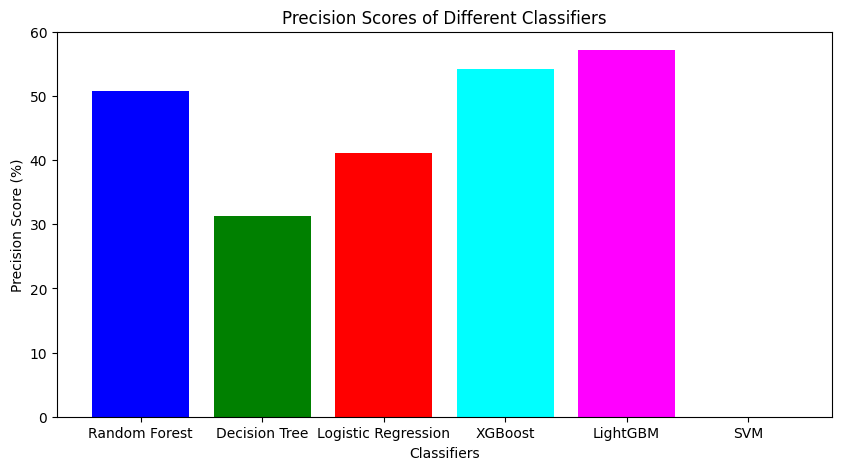

In [ ]:
#precision
rf_precision_percent = rf_precision * 100
dt_precision_percent = dt_precision * 100
lr_precision_percent = lr_precision * 100
xg_precision_percent = xg_precision * 100
lgb_precision_percent = lgb_precision * 100
svm_precision_percent = svm_precision * 100
classifiers = ['Random Forest', 'Decision Tree', 'Logistic Regression', 'XGBoost', 'LightGBM', 'SVM']
plt.figure(figsize=(10, 5))
plt.bar(classifiers, [rf_precision_percent, dt_precision_percent, lr_precision_percent, xg_precision_percent, lgb_precision_percent, svm_precision_percent], color=['blue', 'green', 'red', 'cyan', 'magenta', 'yellow'])
plt.xlabel('Classifiers')
plt.ylabel('Precision Score (%)')
plt.title('Precision Scores of Different Classifiers')
plt.show()

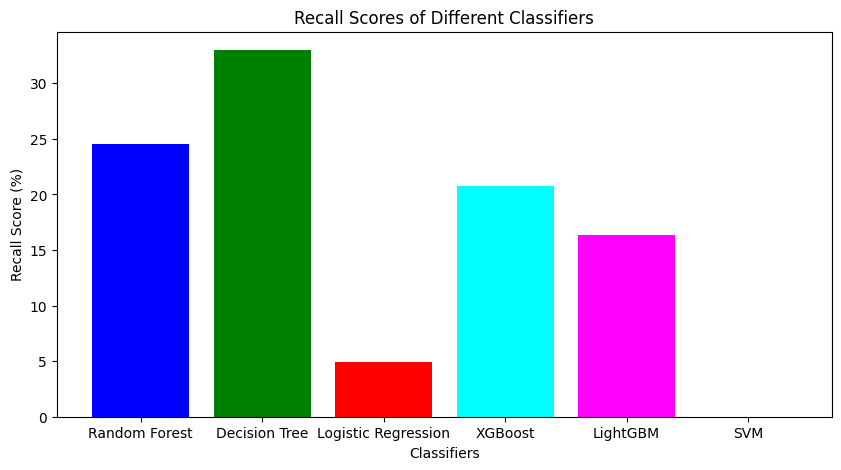

In [ ]:
#Recall
rf_recall_percent = rf_recall * 100
dt_recall_percent = dt_recall * 100
lr_recall_percent = lr_recall * 100
xg_recall_percent = xg_recall * 100
lgb_recall_percent = lgb_recall * 100
svm_recall_percent = svm_recall * 100
classifiers = ['Random Forest', 'Decision Tree', 'Logistic Regression', 'XGBoost', 'LightGBM', 'SVM']
plt.figure(figsize=(10, 5))
plt.bar(classifiers, [rf_recall_percent, dt_recall_percent, lr_recall_percent, xg_recall_percent, lgb_recall_percent, svm_recall_percent], color=['blue', 'green', 'red', 'cyan', 'magenta', 'yellow'])
plt.xlabel('Classifiers')
plt.ylabel('Recall Score (%)')
plt.title('Recall Scores of Different Classifiers')
plt.show()

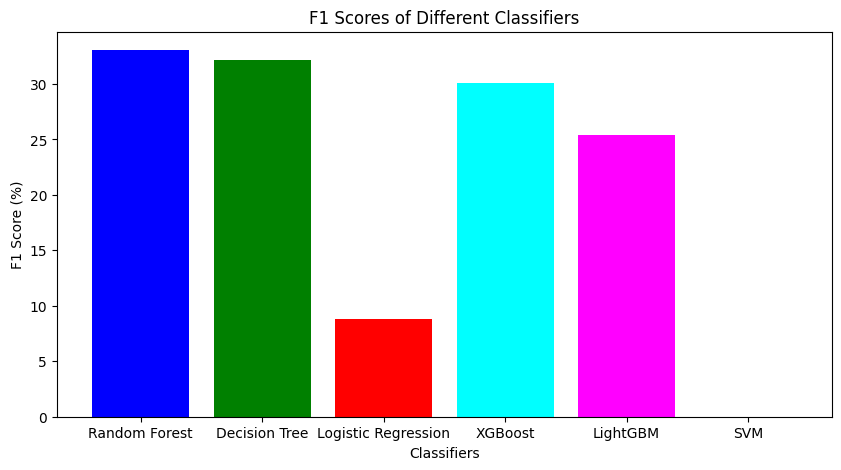

In [ ]:
#F1-Score
rf_f1_percent = rf_f1 * 100
dt_f1_percent = dt_f1 * 100
lr_f1_percent = lr_f1 * 100
xg_f1_percent = xg_f1 * 100
lgb_f1_percent = lgb_f1 * 100
svm_f1_percent = svm_f1 * 100
classifiers = ['Random Forest', 'Decision Tree', 'Logistic Regression', 'XGBoost', 'LightGBM', 'SVM']
plt.figure(figsize=(10, 5))
plt.bar(classifiers, [rf_f1_percent, dt_f1_percent, lr_f1_percent, xg_f1_percent, lgb_f1_percent, svm_f1_percent], color=['blue', 'green', 'red', 'cyan', 'magenta', 'yellow'])
plt.xlabel('Classifiers')
plt.ylabel('F1 Score (%)')
plt.title('F1 Scores of Different Classifiers')
plt.show()

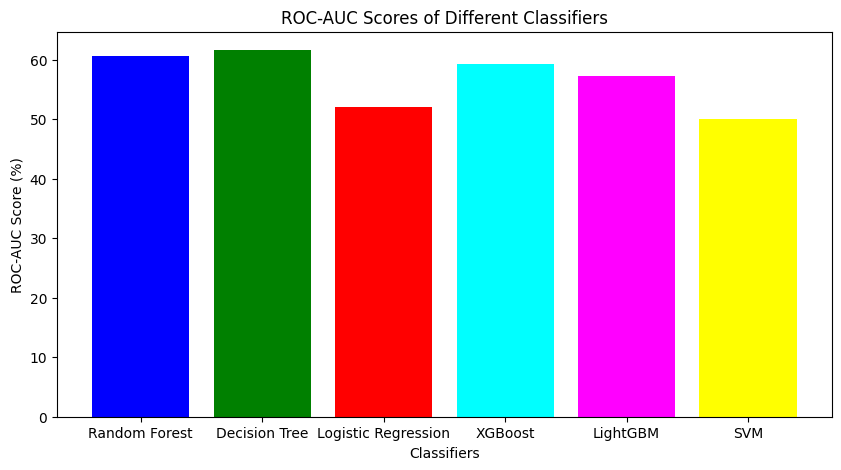

In [ ]:
#ROC-Accuracy
rf_roc_auc_percent = rf_roc_auc * 100
dt_roc_auc_percent = dt_roc_auc * 100
lr_roc_auc_percent = lr_roc_auc * 100
xg_roc_auc_percent = xg_roc_auc * 100
lgb_roc_auc_percent = lgb_roc_auc * 100
svm_roc_auc_percent = svm_roc_auc * 100
classifiers = ['Random Forest', 'Decision Tree', 'Logistic Regression', 'XGBoost', 'LightGBM', 'SVM']
plt.figure(figsize=(10, 5))
plt.bar(classifiers, [rf_roc_auc_percent, dt_roc_auc_percent, lr_roc_auc_percent, xg_roc_auc_percent, lgb_roc_auc_percent, svm_roc_auc_percent], color=['blue', 'green', 'red', 'cyan', 'magenta', 'yellow'])
plt.xlabel('Classifiers')
plt.ylabel('ROC-AUC Score (%)')
plt.title('ROC-AUC Scores of Different Classifiers')
plt.show()